# *Introduction to Monte Carlo Algorithms*
`Doruk Efe Gökmen -- 20/07/2018 -- Ankara`

`Edited by Dibakar Sigdel with Python 3.5 at  10/10/2020`
## Calculation of $\pi$

In [2]:
import random, math
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns
sns.set()
%matplotlib inline

### Direct Sampling:
Calculation of $\pi$ with Monte Carlo algorithm using direct sampling and the calculation of rms deviation.

In [3]:
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0),\
               random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

In [5]:
n_runs = 10
n_trials = 4000
for run in range(n_runs):
    print (4.0 * direct_pi(n_trials) / float(n_trials))

#Calculation of rms deviation for 500 runs:
n_runs = 100
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

3.195
3.161
3.121
3.175
3.184
3.103
3.117
3.136
3.111
3.124


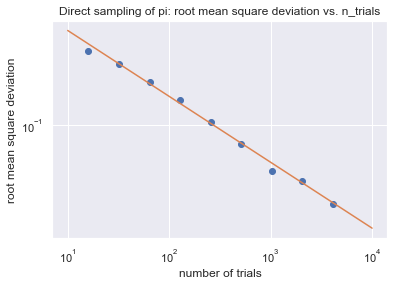

In [7]:
plt.plot(n_trials_list, sigmasqs, 'o')

plt.plot([10.0, 10000.0], [1.642 / math.sqrt(10.0),\
                           1.642 / math.sqrt(10000.0)])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('number of trials')
plt.ylabel('root mean square deviation')
plt.title('Direct sampling of pi: root mean square deviation vs. n_trials')
plt.savefig('direct_sampling_rms_deviation.png')
plt.show()

Bunching method to calculate the error without knowing the value of $\pi$.

In [8]:
n_trials = 400000
n_hits = 0
var = 0.0
var_est = 0.0
Obs_exp = 0.0
Obs2_exp = 0.0
for iter in range(n_trials):
    x, y = random.uniform(-1.0, 1.0),\
           random.uniform(-1.0, 1.0)
    Obs = 0.0
    if x**2 + y**2 < 1.0:
        n_hits += 1
        Obs = 4.0
    Obs_exp+=Obs/n_trials #expectation value of the observable
    Obs2_exp+=(Obs)**2/n_trials #expectation value of the square of the observable
    var+=(Obs-math.pi)**2/n_trials #calculation of the variance if the value of pi had been known beforehand    
var_est = Obs2_exp - Obs_exp**2 #best estimate to the variance
print (4.0 * n_hits / float(n_trials), math.sqrt(var), math.sqrt(var_est))

3.14139 1.6423242399054079 1.642324227390058


### Markov-chain Sampling:
Calculation of $\pi$ with Monte Carlo algorithm using Markov chain sampling, multiple runs.

In [9]:
def markov_pi(N, delta): 
    x, y = 1.0, 1.0
    n_hits = 0
    n_accept = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            n_accept += 1
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

In [11]:
n_runs = 10
n_trials = 4000
delta = 0.1
for run in range(n_runs):
    print (4.0 * markov_pi(n_trials, delta) / float(n_trials))

2.594
3.261
3.225
3.451
3.041
2.903
3.241
3.005
3.084
3.087


In [12]:
def markov_pi_acceptance(N, delta): 
    x, y = 1.0, 1.0
    n_hits = 0
    n_accept = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            n_accept += 1
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_accept

In [14]:
n_runs = 1
n_trials = 2**12
for delta in [0.062,0.125,0.25,0.5,1.0,2.0,4.0]:
    print(markov_pi(n_trials, delta)/ float(n_trials))

0.7802734375
0.829345703125
0.778076171875
0.75048828125
0.778564453125
0.79345703125
0.849609375


In [16]:
def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

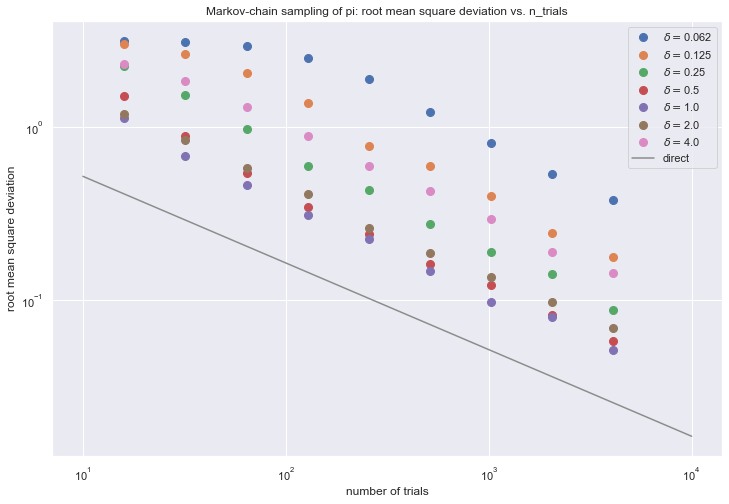

In [17]:
plt.figure(figsize = [12,8])
n_runs = 500
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            pi_est = 4.0 * markov_pi(n_trials, delta) / float(n_trials)
            sigma += (pi_est - math.pi) ** 2
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)
    plt.plot(n_trials_list, sigmas, 'o',\
             ms = 8, label = '$\delta = $' + str(delta))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('number of trials')
plt.ylabel('root mean square deviation')
plt.plot([10,10000],[1.642 / math.sqrt(10.0),\
        1.642 / math.sqrt(10000.0)], label = 'direct')
plt.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
plt.legend(loc='upper right')
plt.savefig('markov_sampling_rms_deviation.png')
plt.show()

Bunching method for Markov-chain sampling. By this method, Markov-chain data are analyzed as direct-sampling ones and the error is underestimated at the beginning since the data is correlated, but that at later stages of the bunching they become more and more uncorrelated, just as direct-sampling data and the saturation (plateau) comes from the fact that the data are almost unrelated. For uncorrelated data, one has a plateau.

In [18]:
def markov_pi_all_data(N, delta):
    x, y = 1.0, 1.0
    data = []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data.append(4.0)
        else:
            data.append(0.0)
    return data

3.1645660400390625 mean value, estimate of pi
0.022973386449269384 mean value, estimate of pi


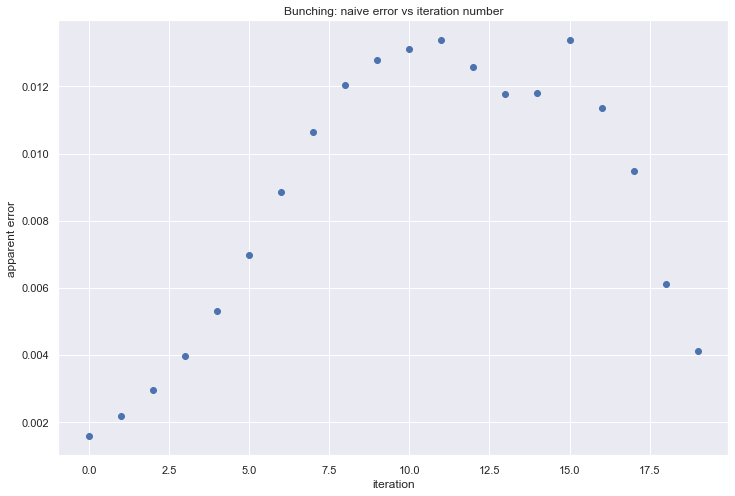

In [20]:
plt.figure(figsize = [12,8])
poweroftwo = 20
n_trials = 2 ** poweroftwo
delta = 0.1
data = markov_pi_all_data(n_trials, delta)
errors  = []
bunches = []
for i in range(poweroftwo):
    new_data = []
    mean = 0.0
    mean_sq = 0.0
    N = len(data)
    while data != []:
        x = data.pop()
        y = data.pop()
        mean += x + y
        mean_sq += x ** 2 + y ** 2
        new_data.append((x + y) / 2.0 )
    errors.append(math.sqrt(mean_sq / N - (mean / N) ** 2) / math.sqrt(N))
    bunches.append(i)
    data = new_data[:]
print (mean / float(N), 'mean value, estimate of pi')
print (mean / float(N) - math.pi, 'mean value, estimate of pi')
plt.plot(bunches, errors, 'o')
plt.xlabel('iteration')
plt.ylabel('apparent error')
plt.title('Bunching: naive error vs iteration number')
plt.savefig('apparent_error_bunching.png')
plt.show()

## The Pebble Game
Simulation of the 3$\times$3 pebble game with animation.

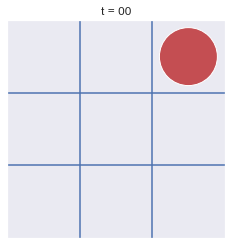

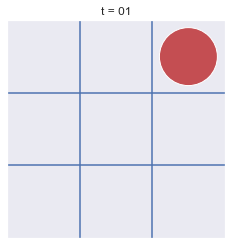

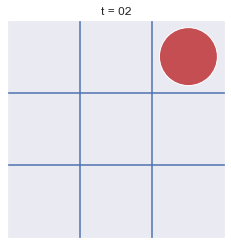

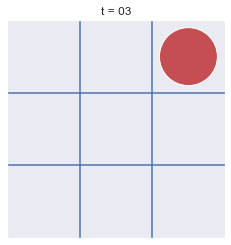

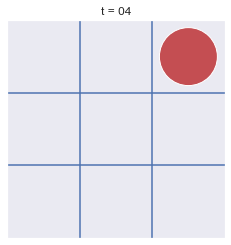

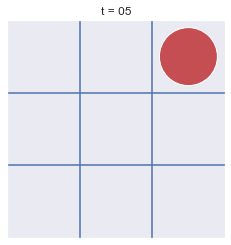

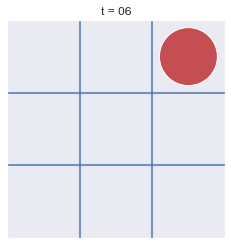

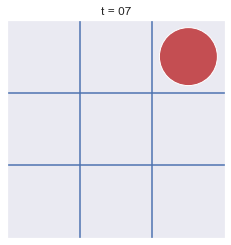

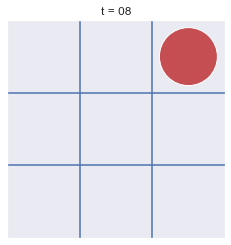

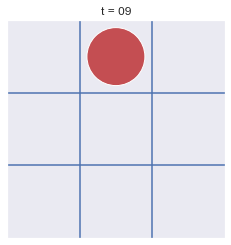

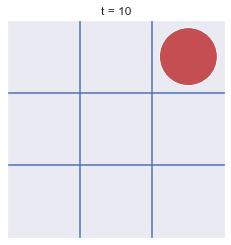

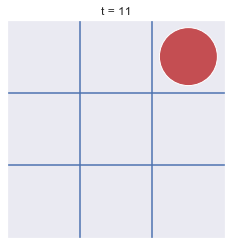

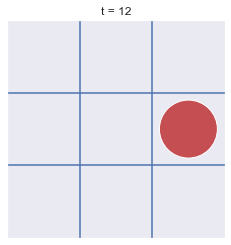

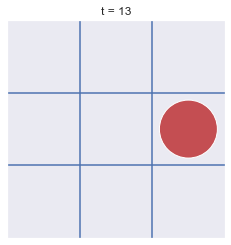

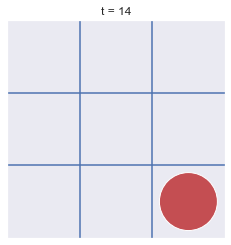

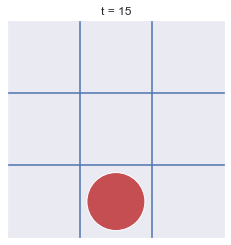

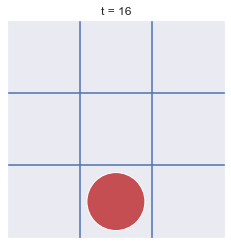

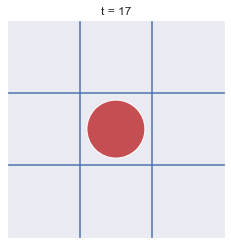

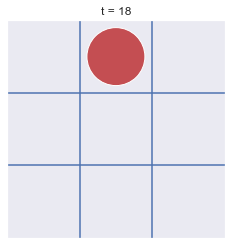

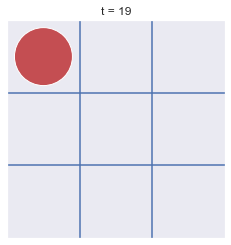

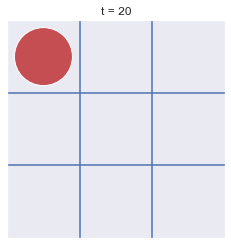

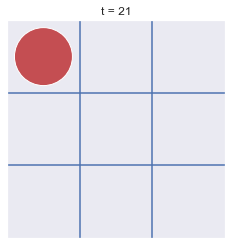

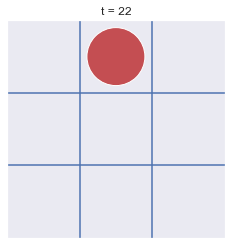

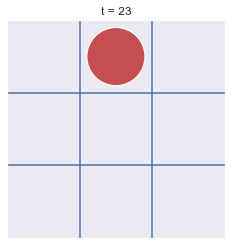

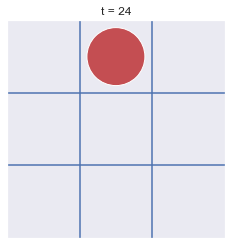

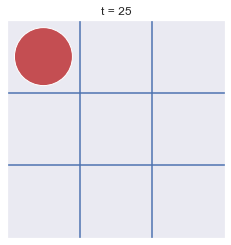

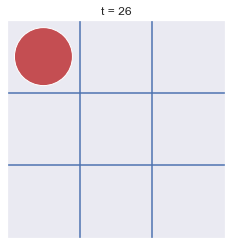

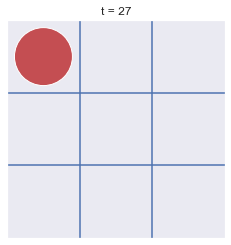

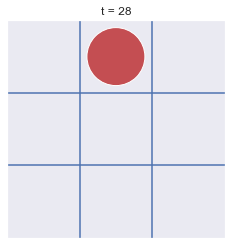

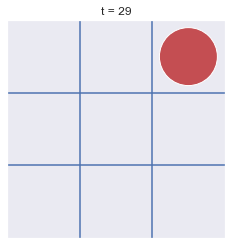

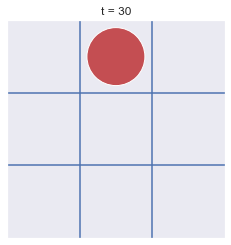

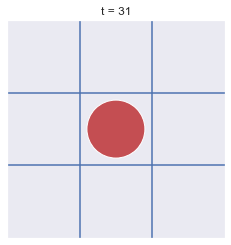

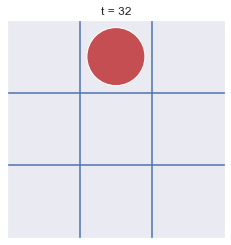

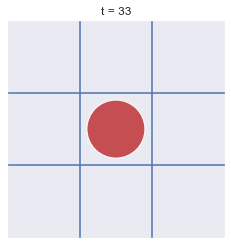

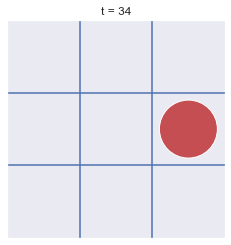

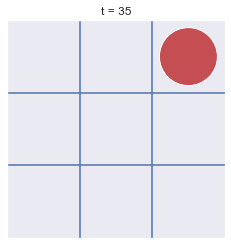

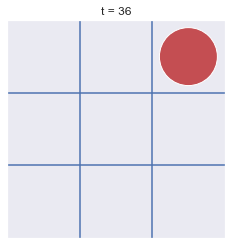

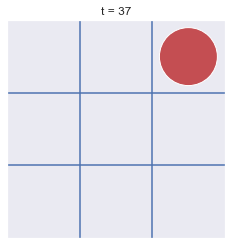

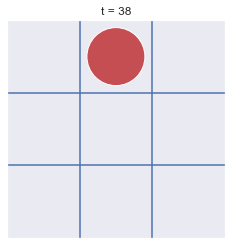

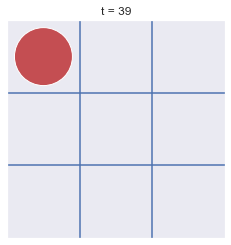

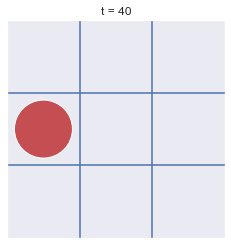

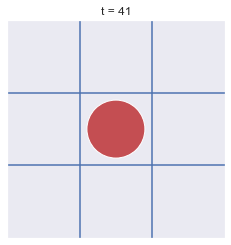

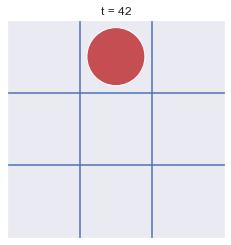

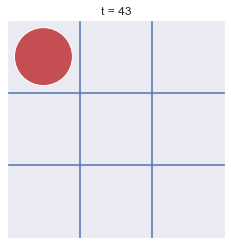

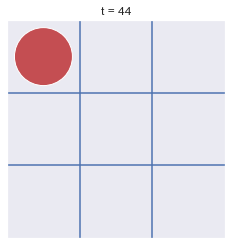

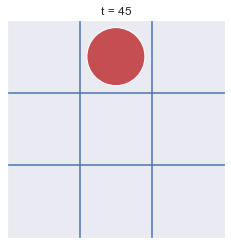

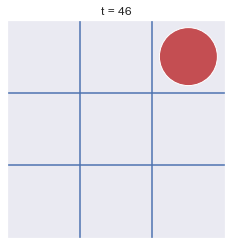

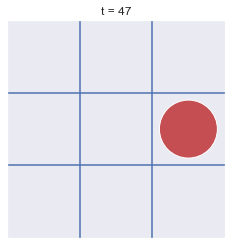

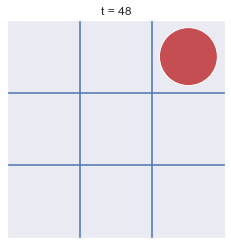

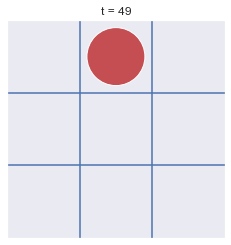

In [22]:
sigma = 0.4  # sigma and s_map are needed for the graphical output
s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)] 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
site = 8
N_runs = 50
for run in range(N_runs):
    if run < 10: number_string = '0'+str(run)
    else: number_string = str(run)
    # Begin of graphical output
    plt.clf() #clears the previous figure
    cir = plt.Circle(s_map[site], radius=sigma, fc='r')
    plt.gca().add_patch(cir)
    plt.plot([0.5, 3.5], [1.5, 1.5], 'b')
    plt.plot([0.5, 3.5], [2.5, 2.5], 'b')
    plt.plot([1.5, 1.5], [0.5, 3.5], 'b')
    plt.plot([2.5, 2.5], [0.5, 3.5], 'b')
    plt.title('t = '+ number_string)
    plt.axis('scaled')
    plt.axis([0.5, 3.5, 0.5, 3.5])
    plt.xticks([])
    plt.yticks([])
    plt.pause(0.05) #Pause to generate a real time animation
    plt.show()
    # End of graphical output
    site = neighbor[site][ random.randint(0, 3)]

Basic pebble throw game with homogeneous steady state probabilities. Multiple runs. The probability of landing on each grid element after a specified number of runs is visualised by a two dimensional histogram.

In [23]:
#define the grid in terms of transitions:[0=right,1=up,2=left,3=down]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]] 
t_max = 4 #maximum number of pebble throws at each run
N_runs = 10 #number of runs
for run in range(N_runs): #run many times
    site = 8 #initial site
    t = 0 #initialise time
    while t < t_max: #a pebble game of t_max throws
        t += 1
        site = neighbor[site][random.randint(0, 3)] #Pick a random transition from the initial site
    print(site) #prints the final site after t_max throws in each run

1
4
7
4
8
8
4
5
4
3


[[0.   0.   2.25]
 [0.   0.   0.  ]
 [0.   0.   0.  ]]
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0.        0.562815  1.1223225]
 [0.        0.        0.5648625]
 [0.        0.        0.       ]]
[[0.      0.25014 0.49881]
 [0.      0.      0.25105]
 [0.      0.      0.     ]]
[[0.142245  0.4214025 0.8426025]
 [0.        0.2801925 0.42453  ]
 [0.        0.        0.1390275]]
[[0.06322 0.18729 0.37449]
 [0.      0.12453 0.18868]
 [0.      0.      0.06179]]
[[0.179955  0.4201425 0.6327   ]
 [0.10278   0.2138625 0.4181625]
 [0.        0.10575   0.1766475]]
[[0.07998 0.18673 0.2812 ]
 [0.04568 0.09505 0.18585]
 [0.      0.047   0.07851]]
[[0.2207475 0.361665  0.5249475]
 [0.121725  0.26163   0.3608325]
 [0.05418   0.1224675 0.221805 ]]
[[0.09811 0.16074 0.23331]
 [0.0541  0.11628 0.16037]
 [0.02408 0.05443 0.09858]]
[[0.2302425 0.3388725 0.4460625]
 [0.1677825 0.242055  0.3436875]
 [0.0869175 0.1636425 0.2307375]]
[[0.10233 0.15061 0.19825]
 [0.07457 0.10758 0.15275]
 [0.03863 0.07273 0.10255]

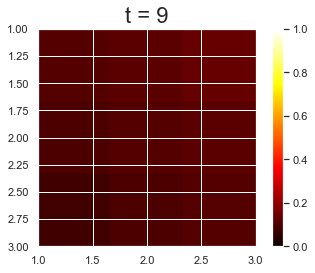

In [25]:
%matplotlib qt
xvec = {1:3, 2:2, 3:1, 4:3, 5:2, 6:1, 7:3, 8:2, 9:1} 
yvec = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3} 

neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}

N_runs = 10
for run in range(N_runs):
    list_vec = []
    if run < 10:  run_str= '0'+str(run)
    else: run_str = str(run)
    for n_runs in range(100000): 
        pos = 9
        for iter in range(run):
            pos = neighbor[pos][ random.randint(0, 3)]
        list_vec.append(pos)

    x = [xvec[k] for k in list_vec]
    y = [yvec[k] for k in list_vec]

    plt.xticks([])
    plt.yticks([])
    H, xedges, yedges = np.histogram2d(x, y, bins=(3, 3), 
               range=[[1,3],[1,3]], normed=True)
    print (H)
    H /= np.sum(H)
    print (H)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    plt.clf() #clears the previous figure
    histo = plt.imshow(H, extent=extent, interpolation='nearest', vmin=0, vmax=1.00)
    histo.set_cmap('hot')
    plt.colorbar()
    plt.title('t = '+str(run),fontsize=22)
    plt.savefig('3x3_pebble_run_'+run_str+'.png')
    plt.pause(0.05)
    plt.show()

## Transfer Matrix Method
Exact simulation of the 3$\times$3 pebble game can be done using the transfer matrix for 50 throws. The evolution of the probability vector indicates that at large times the effect of the multiplication by the transfer matrix on the probability vector is negligible compared to the changes at small times. That means that the equilibrium probability vector is an eigenvector of the transfer matrix with eigenvalue 1.

In [30]:
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

transfer = np.zeros((9, 9)) #initialise the transfer matrix
#the transfer matrix is constructed by adding the probabilities for all of the the terms 
#that contribute to a specific transition to determine each element in the matrix
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25 

#initial probability vector: pebble is at position 8 with certainty
position = np.zeros(9)
position[8] = 1.0 
for t in range(50):
    print (t,'  ',["%0.5f" % i for i in position])
    position = np.dot(transfer, position) #probability vector at time t

0    ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '1.00000']
1    ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.25000', '0.00000', '0.25000', '0.50000']
2    ['0.00000', '0.00000', '0.06250', '0.00000', '0.12500', '0.18750', '0.06250', '0.18750', '0.37500']
3    ['0.00000', '0.04688', '0.07812', '0.04688', '0.09375', '0.18750', '0.07812', '0.18750', '0.28125']
4    ['0.02344', '0.05469', '0.09766', '0.05469', '0.11719', '0.16016', '0.09766', '0.16016', '0.23438']
5    ['0.03906', '0.07324', '0.10254', '0.07324', '0.10742', '0.15234', '0.10254', '0.15234', '0.19727']
6    ['0.05615', '0.08057', '0.10767', '0.08057', '0.11279', '0.13989', '0.10767', '0.13989', '0.17480']
7    ['0.06836', '0.08929', '0.10895', '0.08929', '0.11023', '0.13379', '0.10895', '0.13379', '0.15735']
8    ['0.07883', '0.09421', '0.11024', '0.09421', '0.11154', '0.12758', '0.11024', '0.12758', '0.14557']
9    ['0.08652', '0.09871', '0.11057', '0.09871', '0.11

Find all of the eigenvalues of the transfer matrix. What do the eigenvalues mean, apart from 1, which is associated with equilibrium?

In [32]:
np.set_printoptions(suppress=True) #suppress scientific format

eigenvalues, eigenvectors = np.linalg.eig(transfer) #eigenvalues of the transfer matrix
idx = np.argsort(-eigenvalues) #sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]
print (eigenvalues) #print the sorted eigenvalues
# you may print the eigenvectors by uncommenting the following lines...
#for iter in range(9):
#    print eigenvalues[iter]
#    for i in range(9):
#       print eigenvectors[i][iter]

[ 1.    0.75  0.75  0.5   0.25  0.25 -0.   -0.   -0.5 ]


To obtain the deviation from the equilibrim value at each time, subtract the equilibrium probabilities from each probability vector and take the absolute value. Specifically, the evolution of the deviation in the site 0 is plotted in semi-log scale. It is found that the resulting line is approximately parallel to $0.75^t$ in semi-log scale.

0    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.88889']
1    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.13889', '0.11111', '0.13889', '0.38889']
2    ['0.11111', '0.11111', '0.04861', '0.11111', '0.01389', '0.07639', '0.04861', '0.07639', '0.26389']
3    ['0.11111', '0.06424', '0.03299', '0.06424', '0.01736', '0.07639', '0.03299', '0.07639', '0.17014']
4    ['0.08767', '0.05642', '0.01345', '0.05642', '0.00608', '0.04905', '0.01345', '0.04905', '0.12326']
5    ['0.07205', '0.03787', '0.00857', '0.03787', '0.00369', '0.04123', '0.00857', '0.04123', '0.08615']
6    ['0.05496', '0.03054', '0.00345', '0.03054', '0.00168', '0.02878', '0.00345', '0.02878', '0.06369']
7    ['0.04275', '0.02182', '0.00216', '0.02182', '0.00088', '0.02268', '0.00216', '0.02268', '0.04624']
8    ['0.03228', '0.01690', '0.00087', '0.01690', '0.00043', '0.01647', '0.00087', '0.01647', '0.03446']
9    ['0.02459', '0.01241', '0.00054', '0.01241', '0.00

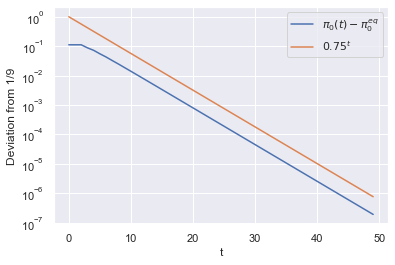

In [37]:
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = np.zeros((9, 9))

site_0=np.zeros(50)
fit=np.zeros(50)
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
position = np.zeros(9)
position[8] = 1.0
for t in range(50):
    print (t,'  ',["%0.5f" % abs(i- 1.0 / 9.0) for i in position])
    position = np.dot(transfer, position)
    fit[t]=0.75**t
    site_0[t]=abs(position[0]- 1.0 / 9.0)

plt.clf()
plt.semilogy(site_0, label="$\pi_0(t)-\pi_0^{eq}$")
plt.semilogy(fit, label="$0.75^t$")
plt.ylabel('Deviation from 1/9')
plt.xlabel('t')
plt.grid(True)
plt.legend(shadow=False, fancybox=True)
plt.show()

Dual pebble game with a finite probability of switching between the games to ensure irreducability of the transfer matrix.

In [3]:
%pylab qt
import random, pylab

random.seed('1234')
sigma = 0.4
epsilon = 0.4  # probability to switch from red to blue pebble, and vice versa
pylab.figure()
s_map_red =  [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
              (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
              (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)] 
offset = 3.0
s_map_blue = [(x+offset,y-offset) for (x,y) in s_map_red]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
color = 'red'  #chose 'red' or 'blue'
site = 8
tmax = 240
for iter in range(tmax):
    period = 4
    if (iter%period) == 0:
	# Begin of graphical output
        pylab.clf()
        maxlength = len(str(tmax-1))
        number_string = str(iter).zfill(maxlength)
        if color == 'red':  cir = pylab.Circle(s_map_red[site],  radius=sigma, fc='r')
        if color == 'blue': cir = pylab.Circle(s_map_blue[site], radius=sigma, fc='b')
	pylab.figure()
        pylab.gca().add_patch(cir)
        pylab.plot([0.5, 3.5], [0.5, 0.5], 'r')
        pylab.plot([0.5, 3.5], [1.5, 1.5], 'r')
        pylab.plot([0.5, 3.5], [2.5, 2.5], 'r')
        pylab.plot([1.5, 1.5], [0.5, 3.5], 'r')
        pylab.plot([2.5, 2.5], [0.5, 3.5], 'r')
        pylab.plot([3.5, 3.5], [0.5, 3.5], 'r')
        pylab.plot([0.5+offset, 3.5+offset], [1.5-offset, 1.5-offset], 'b')
        pylab.plot([0.5+offset, 3.5+offset], [2.5-offset, 2.5-offset], 'b')
        pylab.plot([0.5+offset, 3.5+offset], [3.5-offset, 3.5-offset], 'b')
        pylab.plot([0.5+offset, 0.5+offset], [0.5-offset, 3.5-offset], 'b')
        pylab.plot([1.5+offset, 1.5+offset], [0.5-offset, 3.5-offset], 'b')
        pylab.plot([2.5+offset, 2.5+offset], [0.5-offset, 3.5-offset], 'b')
        pylab.title('t = '+ number_string)
        pylab.axis('scaled')
        pylab.axis([0.5, 6.5, -2.5, 3.5])
        pylab.xticks([])
        pylab.yticks([])
        number_string_filename = str(iter/period).zfill(3)
        pylab.pause(0.05)
        pylab.close()
	# End of graphical output
    newsite = neighbor[site][ random.randint(0, 3)]
    newcolor = color
    if (color == 'red') and (site == 2) and (newsite == 2):
        if random.random() < epsilon:
            newcolor = 'blue'
            newsite = 6
            print "transition red->blue at time = ", iter
    if (color == 'blue') and (site == 6) and (newsite == 6):
        if random.random() < epsilon:
            newcolor = 'red'
            newsite = 2
            print "transition blue->red at time = ", iter
    site = newsite
    color = newcolor

Populating the interactive namespace from numpy and matplotlib
transition red->blue at time =  176
transition blue->red at time =  197
transition red->blue at time =  198
transition blue->red at time =  199
transition red->blue at time =  211
transition blue->red at time =  213


Recurrent pebble game with $2\times 2$ grid with small aperiodicity.

In [4]:
%pylab qt
import math, random, pylab

sigma = 0.4
epsilon = 0.1
pylab.figure()
s_map = [(1.0, 1.0), (2.0, 1.0)] 
neighbor =  [[1], [0]]
pos = 0
tmax = 20
for iter in range(tmax):
    # Begin of the graphics output
    pylab.figure()
    number_string = str(iter).zfill(len(str(tmax)))
    cir = pylab.Circle(s_map[pos], radius=sigma, fc='r')
    pylab.gca().add_patch(cir)
    pylab.plot([1.5, 1.5], [0.5, 1.5], 'b')
    pylab.title('t = '+ number_string)
    pylab.axis('scaled')
    pylab.axis([0.5, 2.5, 0.5, 1.5])
    pylab.xticks([])
    pylab.yticks([])
    #pylab.savefig('2x1pebble_epsilon'+number_string+'.png', transparent=True)
    pylab.pause(0.05)
    pylab.clf()
    pylab.close()
    # End of the graphics output
    newpos = neighbor[pos][0]
    if random.random() < epsilon:
        newpos = pos
    pos = newpos

Populating the interactive namespace from numpy and matplotlib


Basic pebble throw game with inhomogeneous steady state probabilities.

In [15]:
import random

#define the grid in terms of transitions:[right,up,left,down]
histo = [0, 0, 0, 0, 0, 0, 0, 0, 0]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
weight = [3.0, 0.5, 1.0, 0.5, 1.0, 0.5, 2.0, 0.5, 1.0]
pos = 8
n_iter = 1000000
for iter in range(n_iter):
    new_pos = neighbor[pos][random.randint(0, 3)]
    if random.random() < weight[new_pos] / weight[pos]:
        pos = new_pos
    histo[pos] += 1 

norm = sum(weight)
print 'comparison:  weight, histogram'
for k in range(9): 
    print 'site: ', k,' weight: ', weight[k], ' histo: ', norm * histo[k] / float(n_iter)

comparison:  weight, histogram
site:  0  weight:  3.0  histo:  3.00848
site:  1  weight:  0.5  histo:  0.49825
site:  2  weight:  1.0  histo:  0.99388
site:  3  weight:  0.5  histo:  0.50321
site:  4  weight:  1.0  histo:  1.00448
site:  5  weight:  0.5  histo:  0.49447
site:  6  weight:  2.0  histo:  2.01049
site:  7  weight:  0.5  histo:  0.50085
site:  8  weight:  1.0  histo:  0.98589
